In [1]:
'''
Build a suggorate model for the data
there are 2 ML models that want to build
if there are 3 dataset, then there are 6 models after training
'''

'\nBuild a suggorate model for the data\nthere are 2 ML models that want to build\nif there are 3 dataset, then there are 6 models after training\n'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data and do train test split
from sklearn.model_selection import KFold, cross_val_score, train_test_split


def load_data(filename, trainLabel, data_ml):
    # Load the data
    df = pd.read_csv(filename)
    
    X_predicted = df.drop(columns=['Label', trainLabel], axis=1)
    y_predicted = df[trainLabel]

    # Initial train test split set
    X_train_predicted, X_test_predicted, y_train_predicted, y_test_predicted = train_test_split(X_predicted, y_predicted, test_size=0.2, random_state=42, stratify=y_predicted)

    # Further split training set into training (70%) and validation (10%) sets
    X_train_predicted, X_val_predicted, y_train_predicted, y_val_predicted = train_test_split(X_train_predicted, y_train_predicted, test_size=0.1, random_state=42, stratify=y_train_predicted)
    
    # save datasets
    train_predicted = pd.concat([X_train_predicted, y_train_predicted], axis=1)
    val_predicted = pd.concat([X_val_predicted, y_val_predicted], axis=1)
    test_predicted = pd.concat([X_test_predicted, y_test_predicted], axis=1)
    train_predicted.to_csv(f'../datasets/surrogate_model/CICIDS2017/split_dataset/train_{data_ml}_predicted.csv', index=False) 
    val_predicted.to_csv(f'../datasets/surrogate_model/CICIDS2017/split_dataset/val_lr_{data_ml}_predicted.csv', index=False)
    test_predicted.to_csv(f'../datasets/surrogate_model/CICIDS2017/split_dataset/test_lr_{data_ml}_predicted.csv', index=False)
    
    return X_train_predicted, X_val_predicted, X_test_predicted, y_train_predicted, y_val_predicted, y_test_predicted



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#draw figure of train test split distribution
def draw_distribution(train, val, test, title):
    train_distribution_lr_predicted = train.value_counts(title)
    train_distribution_lr_predicted = train_distribution_lr_predicted.reset_index()
    train_distribution_lr_predicted["class"] = "train"

    val_distribution_lr_predicted = val.value_counts(title)
    val_distribution_lr_predicted = val_distribution_lr_predicted.reset_index()
    val_distribution_lr_predicted["class"] = "validation"

    test_distribution_lr_predicted = test.value_counts(title)
    test_distribution_lr_predicted = test_distribution_lr_predicted.reset_index()
    test_distribution_lr_predicted["class"] = "test"

    total_distribution_lr_predicted = pd.concat([train_distribution_lr_predicted, val_distribution_lr_predicted, test_distribution_lr_predicted])

    total_distribution_lr_predicted.columns = [title, "Count", "class"]
    grade_map = {
        0: "Benign",
        1: "Malicious"}
    total_distribution_lr_predicted["Label"] = total_distribution_lr_predicted[title].map(grade_map)

    ax = sns.barplot(x="class", y="Count", hue=title, data=total_distribution_lr_predicted, palette="Blues" )
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.bar_label(ax.containers[1], label_type='edge')

In [5]:
# Load data and do train test split
X_train_lr_predicted, X_val_lr_predicted, X_test_lr_predicted, y_train_lr_predicted, y_val_lr_predicted, y_test_lr_predicted = load_data('../surrogate_model/data_for_training/df_lr_predicted_0313.csv', 'LR_Predicted', 'lr')
X_train_dt_predicted, X_val_dt_predicted, X_test_dt_predicted, y_train_dt_predicted, y_val_dt_predicted, y_test_dt_predicted = load_data('../surrogate_model/data_for_training/df_dt_predicted_0313.csv', 'DT_Predicted', 'dt')
X_train_xgb_predicted, X_val_xgb_predicted, X_test_xgb_predicted, y_train_xgb_predicted, y_val_xgb_predicted, y_test_xgb_predicted = load_data('../surrogate_model/data_for_training/df_xgb_predicted_0313.csv', 'XGB_Predicted', 'dt')
X_train_dnn_predicted, X_val_dnn_predicted, X_test_dnn_predicted, y_train_dnn_predicted, y_val_dnn_predicted, y_test_dnn_predicted = load_data('../surrogate_model/data_for_training/df_dnn_predicted_0313.csv', 'DNN_Predicted', 'dnn')

In [6]:
#concate data for visualization
#logistic regression
train_lr_predicted = pd.concat([X_train_lr_predicted, y_train_lr_predicted], axis=1)    
val_lr_predicted = pd.concat([X_val_lr_predicted, y_val_lr_predicted], axis=1)
test_lr_predicted = pd.concat([X_test_lr_predicted, y_test_lr_predicted], axis=1)

#decision tree
train_dt_predicted = pd.concat([X_train_dt_predicted, y_train_dt_predicted], axis=1)
val_dt_predicted = pd.concat([X_val_dt_predicted, y_val_dt_predicted], axis=1)
test_dt_predicted = pd.concat([X_test_dt_predicted, y_test_dt_predicted], axis=1)

# xgboost
train_xgb_predicted = pd.concat([X_train_xgb_predicted, y_train_xgb_predicted], axis=1)
val_xgb_predicted = pd.concat([X_val_xgb_predicted, y_val_xgb_predicted], axis=1)
test_xgb_predicted = pd.concat([X_test_xgb_predicted, y_test_xgb_predicted], axis=1)

#dnn
train_dnn_predicted = pd.concat([X_train_dnn_predicted, y_train_dnn_predicted], axis=1)
val_dnn_predicted = pd.concat([X_val_dnn_predicted, y_val_dnn_predicted], axis=1)
test_dnn_predicted = pd.concat([X_test_dnn_predicted, y_test_dnn_predicted], axis=1)

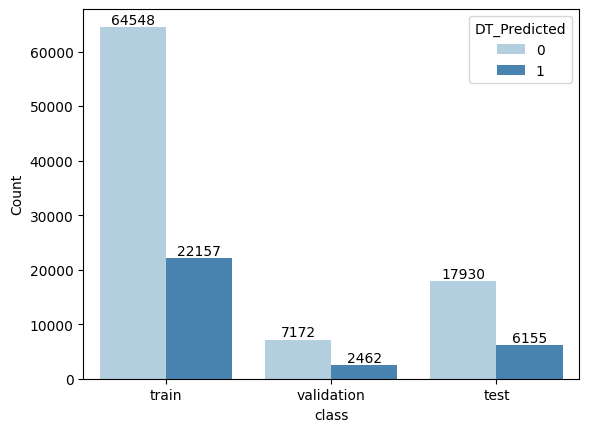

In [7]:
#draw distribution
#logistic regression
#draw_distribution(train_lr_predicted, val_lr_predicted, test_lr_predicted, 'LR_Predicted')

#decision tree
draw_distribution(train_dt_predicted, val_dt_predicted, test_dt_predicted, 'DT_Predicted')

#sgboost
# draw_distribution(train_xgb_predicted, val_xgb_predicted, test_xgb_predicted, 'XGB_Predicted')

## dnn
# draw_distribution(train_dnn_predicted, val_dnn_predicted, test_dnn_predicted, 'DNN_Predicted')

In [8]:
# buile model
# retuen model, y_pred
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import xgboost as xgb

def model_train(modelname, X_train_predicted, y_train_predicted, X_test_predicted, y_test_predicted, X_val_predicted, y_val_predicted, dataset_resource):
    if modelname == 'LogisticRegression':
        model = LogisticRegression()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'DecisionTree':
        model = DecisionTreeClassifier()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'XGBoost':
        model = xgb.XGBClassifier()
        model.fit(X_train_predicted, y_train_predicted)
        
        
    print(modelname)
    print("dataset_resource: ", dataset_resource)
    # Testing
    start_test = time.time()
    y_pred = model.predict(X_test_predicted)
    acc_test = accuracy_score(y_test_predicted, y_pred)
    recall_score_test = recall_score(y_test_predicted, y_pred, average='weighted')
    end_test = time.time()
    testing_time = end_test - start_test


    # Validation
    start_validation = time.time()
    y_val =  model.predict(X_val_predicted)
    val_acc = accuracy_score(y_val_predicted, y_val)
    recall_score_val = recall_score(y_val_predicted, y_val, average='weighted')
    end_validation = time.time()
    validation_time = end_validation - start_validation

    # Results
    print("Accuracy: ", acc_test)
    print("Recall: ", recall_score_test)
    print("Validation Accuracy: ", val_acc)
    print("Validation Recall: ", recall_score_val)
    print("Confusion matrix: \n", confusion_matrix(y_test_predicted, y_pred))
    print("Classification report: \n\n", classification_report(y_test_predicted, y_pred, target_names=['Benign', 'Malicious'], digits=4))
    return model, y_pred

In [9]:
# draw confusion matrix

def draw_confusion_matrix(y_test, y_pred, model, model_name, dataset_resource):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    total = np.sum(cm)
    confusion_percentage = (cm  / total) * 100

    strings = np.asarray([['%', '%'],
                        ['%', '%']])
    labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 10})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix of {model_name} Surrogate Model', fontsize=15)
    # add accuracy
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.text(0.5, 2.5, f'Dataset from: {dataset_resource}', dict(size=12))
    
    plt.show()

### Logostic Regression

In [10]:

lr_model_from_lrdata, y_lrpred_from_lrdata = model_train('LogisticRegression', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, X_val_lr_predicted, y_val_lr_predicted, 'lr')
lr_model_from_dtdata, y_lrpred_from_dtdata = model_train('LogisticRegression', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, X_val_dt_predicted, y_val_dt_predicted, 'dt')
lr_model_from_xgbdata, y_lrpred_from_xgbdata = model_train('LogisticRegression', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, X_val_xgb_predicted, y_val_xgb_predicted, 'xgb')
lr_model_from_dnndata, y_lrpred_from_dnndata = model_train('LogisticRegression', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, X_val_dnn_predicted, y_val_dnn_predicted, 'dnn')



LogisticRegression
dataset_resource:  lr
Accuracy:  0.941623417064563
Recall:  0.941623417064563
Validation Accuracy:  0.9359559892048993
Validation Recall:  0.9359559892048993
Confusion matrix: 
 [[21428   662]
 [  744  1251]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9664    0.9700    0.9682     22090
   Malicious     0.6539    0.6271    0.6402      1995

    accuracy                         0.9416     24085
   macro avg     0.8102    0.7985    0.8042     24085
weighted avg     0.9406    0.9416    0.9411     24085

LogisticRegression
dataset_resource:  dt
Accuracy:  0.6390284409383433
Recall:  0.6390284409383433
Validation Accuracy:  0.632655179572348
Validation Recall:  0.632655179572348
Confusion matrix: 
 [[11014  6916]
 [ 1778  4377]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8610    0.6143    0.7170     17930
   Malicious     0.3876    0.7111    0.5017      6155

 

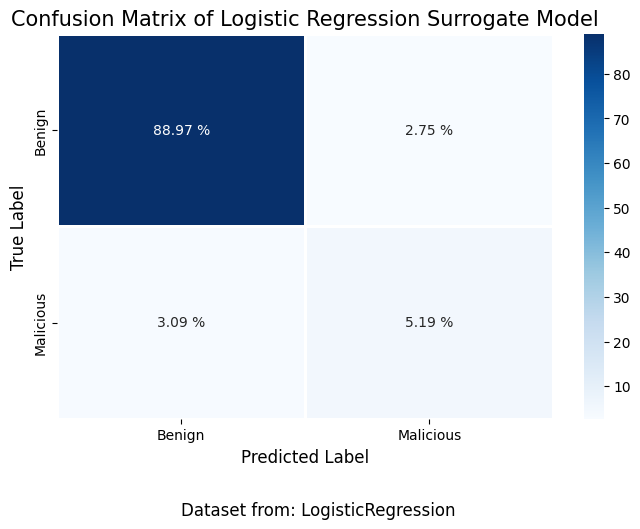

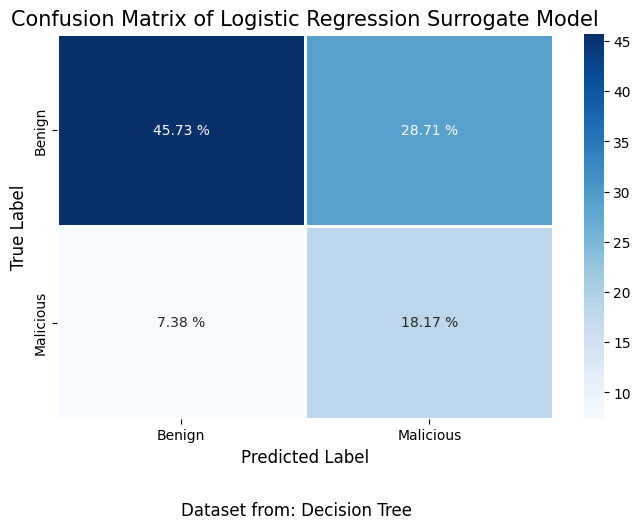

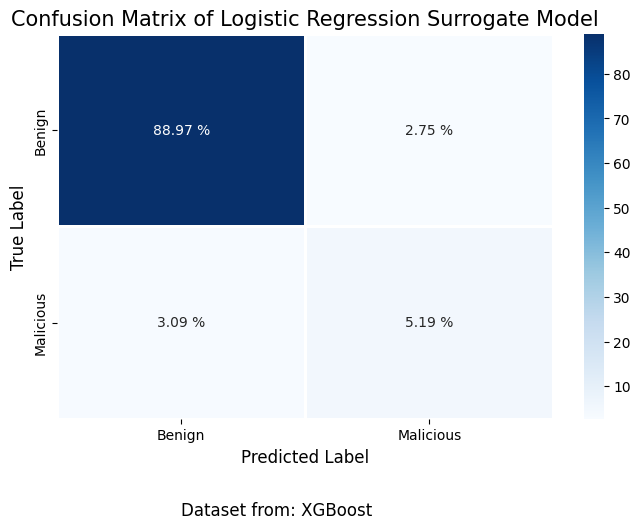

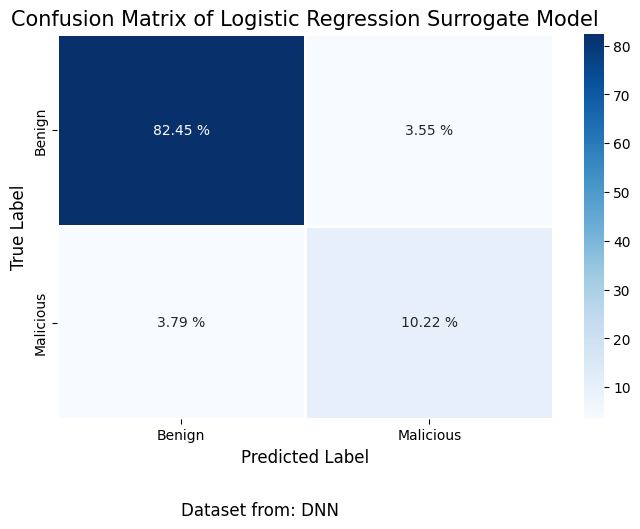

In [11]:

draw_confusion_matrix(y_test_lr_predicted, y_lrpred_from_lrdata, lr_model_from_lrdata, 'Logistic Regression', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_lrpred_from_dtdata, lr_model_from_dtdata, 'Logistic Regression', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_lrpred_from_xgbdata, lr_model_from_xgbdata, 'Logistic Regression', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_lrpred_from_dnndata, lr_model_from_dnndata, 'Logistic Regression', "DNN")

### DecisionTree

In [12]:
dt_model_from_lrdata, y_dtpred_from_lrdata = model_train('DecisionTree', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, X_val_lr_predicted, y_val_lr_predicted, 'lr')
dt_model_from_dtdata, y_dtpred_from_dtdata = model_train('DecisionTree', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, X_val_dt_predicted, y_val_dt_predicted, 'dt')
dt_model_from_xgbdata, y_dtpred_from_xgbdata = model_train('DecisionTree', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, X_val_xgb_predicted, y_val_xgb_predicted, 'xgb')
dt_model_from_dnndata, y_dtpred_from_dnndata = model_train('DecisionTree', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, X_val_dnn_predicted, y_val_dnn_predicted, 'dnn')

DecisionTree
dataset_resource:  lr
Accuracy:  0.9981316171891219
Recall:  0.9981316171891219
Validation Accuracy:  0.9979240190990243
Validation Recall:  0.9979240190990243
Confusion matrix: 
 [[22062    28]
 [   17  1978]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9992    0.9987    0.9990     22090
   Malicious     0.9860    0.9915    0.9888      1995

    accuracy                         0.9981     24085
   macro avg     0.9926    0.9951    0.9939     24085
weighted avg     0.9981    0.9981    0.9981     24085

DecisionTree
dataset_resource:  dt
Accuracy:  0.998546813369317
Recall:  0.998546813369317
Validation Accuracy:  0.9982354162341707
Validation Recall:  0.9982354162341707
Confusion matrix: 
 [[17920    10]
 [   25  6130]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9986    0.9994    0.9990     17930
   Malicious     0.9984    0.9959    0.9972      6155

    accurac

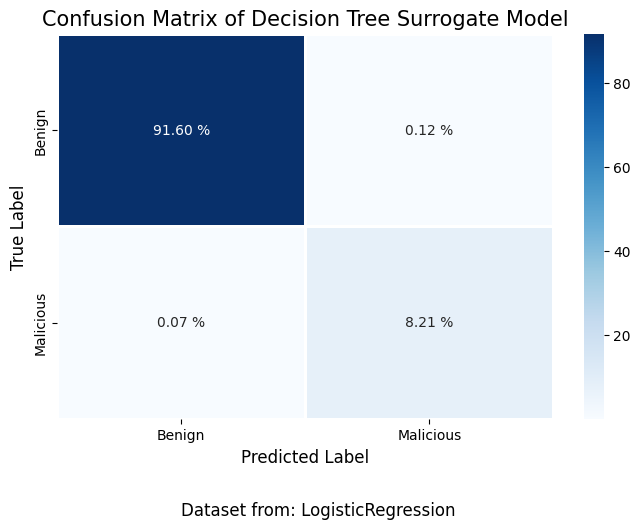

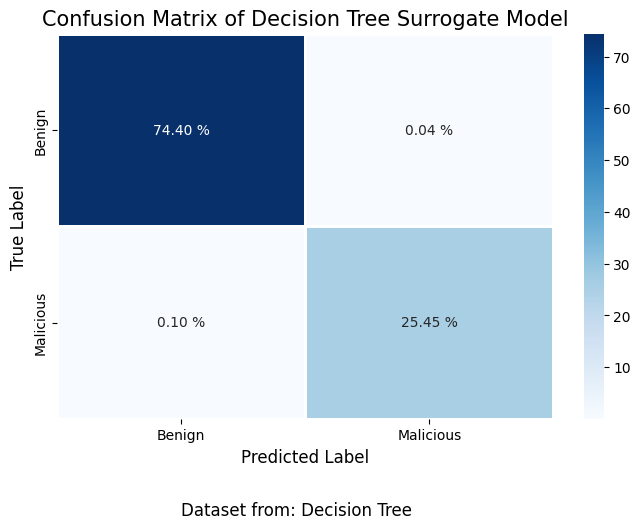

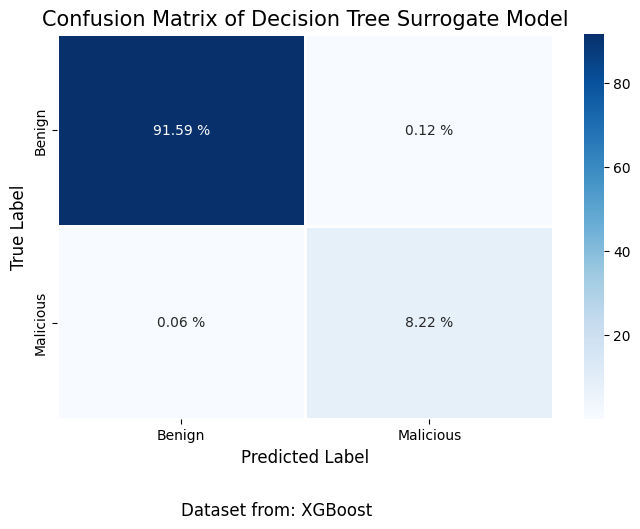

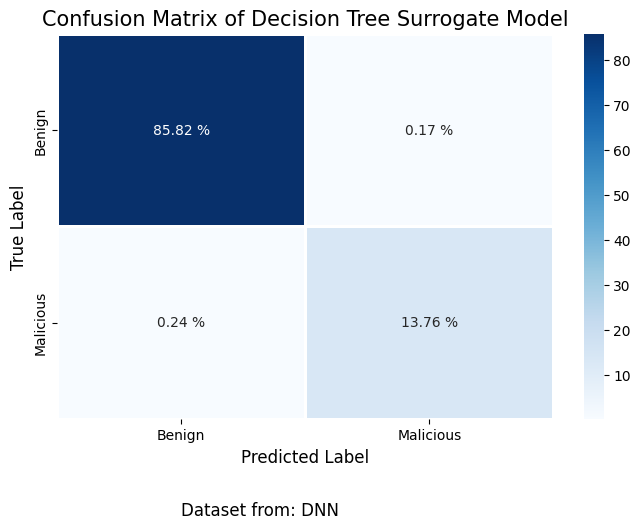

In [13]:
draw_confusion_matrix(y_test_lr_predicted, y_dtpred_from_lrdata, dt_model_from_lrdata, 'Decision Tree', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_dtpred_from_dtdata, dt_model_from_dtdata, 'Decision Tree', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_dtpred_from_xgbdata, dt_model_from_xgbdata, 'Decision Tree', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_dtpred_from_dnndata, dt_model_from_dnndata, 'Decision Tree', "DNN")

### XGBoost

In [14]:
xgb_model_from_lrdata, y_xgbpred_from_lrdata = model_train('XGBoost', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, X_val_lr_predicted, y_val_lr_predicted, 'lr')
xgb_model_from_dtdata, y_xgbpred_from_dtdata = model_train('XGBoost', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, X_val_dt_predicted, y_val_dt_predicted, 'dt')
xgb_model_from_xgbdata, y_xgbpred_from_xgbdata = model_train('XGBoost', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, X_val_xgb_predicted, y_val_xgb_predicted, 'xgb')
xgb_model_from_dnndata, y_xgbpred_from_dnndata = model_train('XGBoost', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, X_val_dnn_predicted, y_val_dnn_predicted, 'dnn')


XGBoost
dataset_resource:  lr
Accuracy:  0.9992111272576293
Recall:  0.9992111272576293
Validation Accuracy:  0.9992734066846585
Validation Recall:  0.9992734066846585
Confusion matrix: 
 [[22084     6]
 [   13  1982]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9994    0.9997    0.9996     22090
   Malicious     0.9970    0.9935    0.9952      1995

    accuracy                         0.9992     24085
   macro avg     0.9982    0.9966    0.9974     24085
weighted avg     0.9992    0.9992    0.9992     24085

XGBoost
dataset_resource:  dt
Accuracy:  0.9985052937512975
Recall:  0.9985052937512975
Validation Accuracy:  0.9977164210089268
Validation Recall:  0.9977164210089268
Confusion matrix: 
 [[17913    17]
 [   19  6136]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9989    0.9991    0.9990     17930
   Malicious     0.9972    0.9969    0.9971      6155

    accuracy       

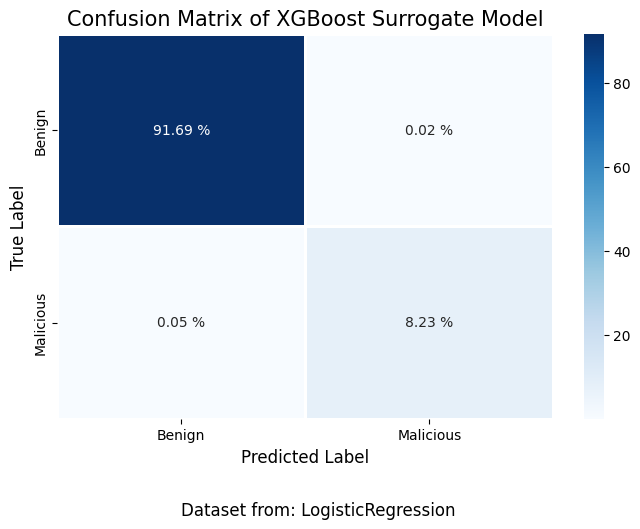

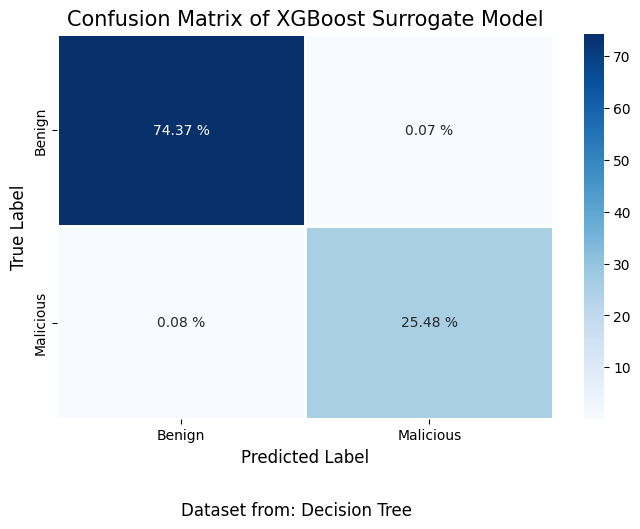

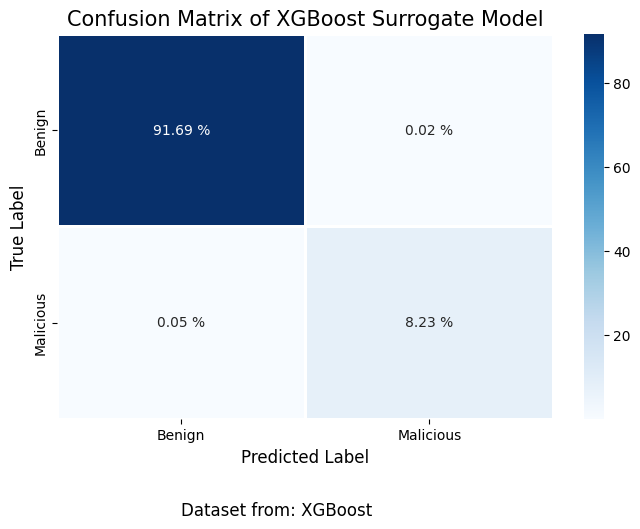

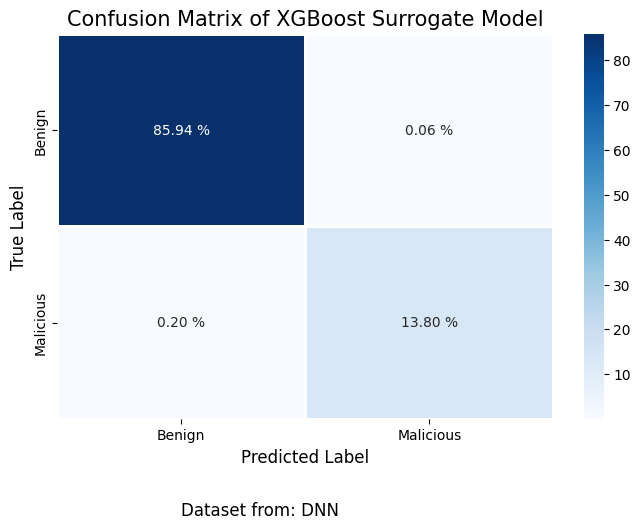

In [15]:
draw_confusion_matrix(y_test_lr_predicted, y_xgbpred_from_lrdata, xgb_model_from_lrdata, 'XGBoost', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_xgbpred_from_dtdata, xgb_model_from_dtdata, 'XGBoost', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_xgbpred_from_xgbdata, xgb_model_from_xgbdata, 'XGBoost', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_xgbpred_from_dnndata, xgb_model_from_dnndata, 'XGBoost', "DNN")

### Save Model

In [16]:
import torch
import pickle

# save model
# pickle.dump(model_dt, open("../target_model/ml_model/target_dt.pickle", "wb")) # target_model\ml_model
# pickle.dump(model_lr, open("../target_model/ml_model/target_lr.pickle", "wb"))

# pickle.dump(lr_model_from_lrdata, open("../surrogate_model/ml_model/lr_model_from_lrdata.pickle", "wb")) # target_model\ml_model
# pickle.dump(lr_model_from_dtdata, open("../surrogate_model/ml_model/lr_model_from_dtdata.pickle", "wb")) # target_model\ml_model
# pickle.dump(lr_model_from_dnndata, open("../surrogate_model/ml_model/lr_model_from_dnndata.pickle", "wb")) # target_model\ml_model

pickle.dump(dt_model_from_lrdata, open("../surrogate_model/ml_model/dt_model_from_lrdata.pickle", "wb")) # target_model\ml_model
pickle.dump(dt_model_from_dtdata, open("../surrogate_model/ml_model/dt_model_from_dtdata.pickle", "wb")) # target_model\ml_model
pickle.dump(dt_model_from_dnndata, open("../surrogate_model/ml_model/dt_model_from_dnndata.pickle", "wb")) # target_model\ml_model

pickle.dump(xgb_model_from_lrdata, open("../surrogate_model/ml_model/xgb_model_from_lrdata.pickle", "wb")) # target_model\ml_model
pickle.dump(xgb_model_from_dtdata, open("../surrogate_model/ml_model/xgb_model_from_dtdata.pickle", "wb")) # target_model\ml_model
pickle.dump(xgb_model_from_dnndata, open("../surrogate_model/ml_model/xgb_model_from_dnndata.pickle", "wb")) # target_model\ml_model

